In [148]:
import matplotlib as mpl
mpl.rcParams.update({'text.color' : "black",
                    'xtick.color' : 'black', 
                    'ytick.color' : 'black', 
                    'legend.edgecolor': 'black',
                     'axes.labelcolor' : "black"})
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ternary
import math
from statistics import mean
from ternary.helpers import simplex_iterator
import sys
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
from main import *

In [153]:
def generate_random_heatmap_data(scale, mode, time, agents, reps):
    ''' This function iterates over the simplex 
    Outputs wealth shares for each strategy 
    In the future this function could output other variables of interest
    Note: only the regular 3-strategy space is implemented. '''
    tf_ws = dict()
    vi_ws = dict()
    nt_ws = dict()
    tf_dr = dict()
    vi_dr = dict()
    nt_dr = dict()
    for (i,j,k) in simplex_iterator(scale):
        Coords  = [i / scale, j / scale, k / scale] 
        tf_share = []
        vi_share = []
        nt_share = []
        tf_return = []
        vi_return = []
        nt_return = []
        for z in range(reps):
            if mode == 'imitation':
                df,pop = main("between", "scholl", time, PROBA_SELECTION, agents, 0, Coords, True, False)
            if mode == 'static':
                df,pop = main("between", "scholl", time, 0, agents, 0, Coords, True, False)
            if mode == 'combined':
                df,pop = main("between", "scholl", time, PROBA_SELECTION, agents, MUTATION_RATE, Coords, True, False)
            tf_share.append(df["WShare_TF"].mean())
            vi_share.append(df["WShare_VI"].mean())
            nt_share.append(df["WShare_NT"].mean())
            tf_return.append(np.nanmean(df["TF_DayReturns"]))
            vi_return.append(np.nanmean(df["VI_DayReturns"]))
            nt_return.append(np.nanmean(df["NT_DayReturns"]))
        tf_ws[(i,j)] = np.nanmean(tf_share)
        vi_ws[(i,j)] = np.nanmean(vi_share)
        nt_ws[(i,j)] = np.nanmean(nt_share)
        tf_dr[(i,j)] = np.nanmean(tf_return)
        vi_dr[(i,j)] = np.nanmean(vi_return)
        nt_dr[(i,j)] = np.nanmean(nt_return)
    return tf_ws, vi_ws, nt_ws, tf_dr, vi_dr, nt_dr


fontsize = 15

def generate_ternary_figure(scale, dataDict, title, color, vmin, vmax):
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(10, 8)
    tax.heatmap(dataDict, style="triangular",cmap=color, vmin = vmin, vmax = vmax)
    tax.boundary()
    tax.clear_matplotlib_ticks()
    ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1, multiple=10)
    tax.left_axis_label("TF (%)", fontsize = fontsize)
    tax.right_axis_label("VI (%)", fontsize = fontsize)
    tax.bottom_axis_label("NT (%)", fontsize = fontsize)
    tax.get_axes().axis('off')
    tax.set_title(title)
    plt.tight_layout()
    tax._redraw_labels()
    return figure, tax

def generate_ternary_figure_nonorm(scale, dataDict, title, color):
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(10, 8)
    tax.heatmap(dataDict, style="triangular",cmap=color)
    tax.boundary()
    tax.clear_matplotlib_ticks()
    ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1, multiple=10) #, axes_color={'l': 'w', 'r':'w', 'b': 'w'})
    tax.left_axis_label("TF (%)")
    tax.right_axis_label("VI (%)")
    tax.bottom_axis_label("NT (%)")
    tax.get_axes().axis('off')
    tax.set_title(title, color='black')
    return figure, tax

def dict_substract(dict1, dict2):
    res = {key: dict1[key] - dict2.get(key, 0) for key in dict1.keys()}
    return res


In [ ]:
scale = 12
reps = 10
TFws1000, VIws1000, NTws1000, TFdr1000, VIdr1000, NTdr1000 = generate_random_heatmap_data(scale, 'static', 1000, 3, reps)
TFws1000Cb, VIws1000Cb, NTws1000Cb, TFdr1000Cb, VIdr1000Cb, NTdr1000Cb = generate_random_heatmap_data(scale, 'imitation', 1000, 3, reps)







In [161]:
DiffTFws = dict_substract(TFws1000Cb,TFws1000)
DiffVIws = dict_substract(VIws1000Cb,VIws1000)
DiffNTws = dict_substract(NTws1000Cb,NTws1000)

DiffTFdr = dict_substract(TFdr1000Cb,TFdr1000)
DiffVIdr = dict_substract(VIdr1000Cb,VIdr1000)
DiffNTdr = dict_substract(NTdr1000Cb,NTdr1000)

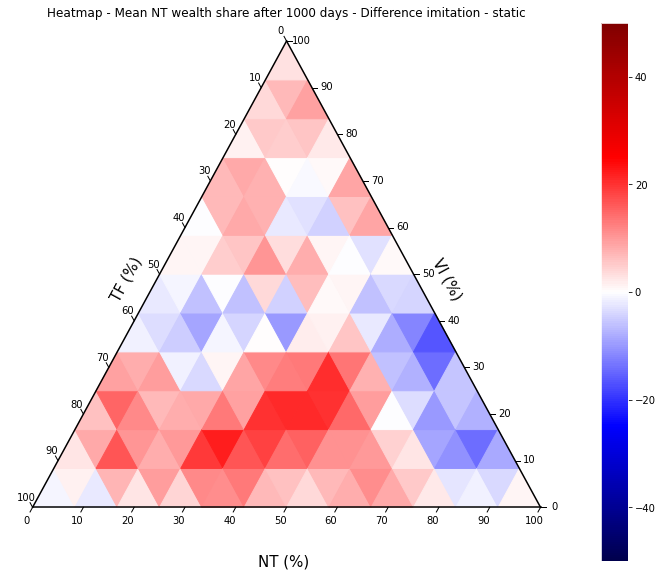

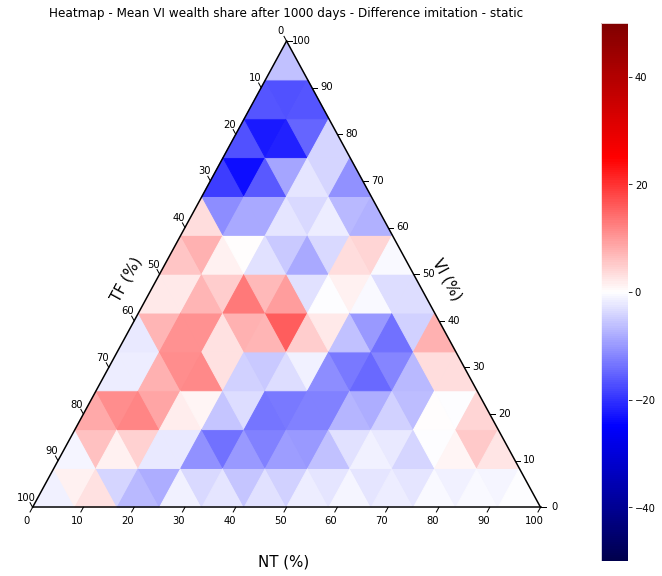

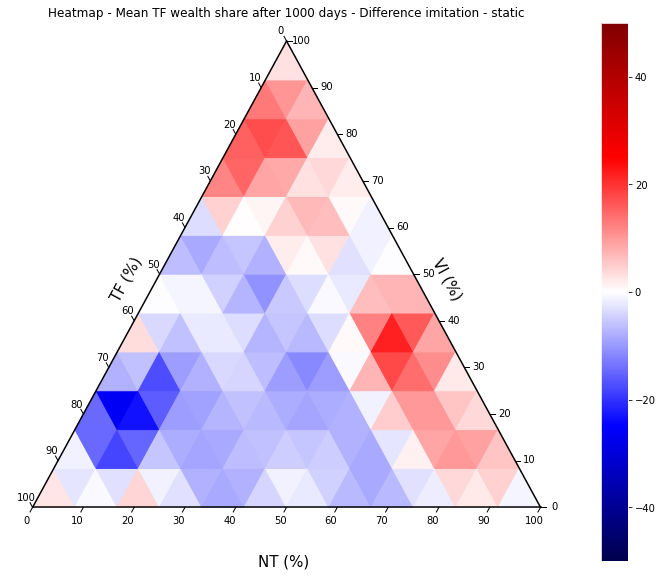

In [162]:
title = "Heatmap - Mean NT wealth share after 1000 days - Difference imitation - static"
figure1, tax1 = generate_ternary_figure(scale, DiffNTws, title, color = 'seismic', vmin = -50, vmax = 50)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_WS_diff.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI wealth share after 1000 days - Difference imitation - static"
figure2, tax2 = generate_ternary_figure(scale, DiffVIws, title, color = 'seismic', vmin = -50, vmax = 50)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_WS_diff.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF wealth share after 1000 days - Difference imitation - static"
figure3, tax3 = generate_ternary_figure(scale, DiffTFws, title, color = 'seismic', vmin = -50, vmax = 50)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_WS_diff.png', dpi = 300)
tax3.show()




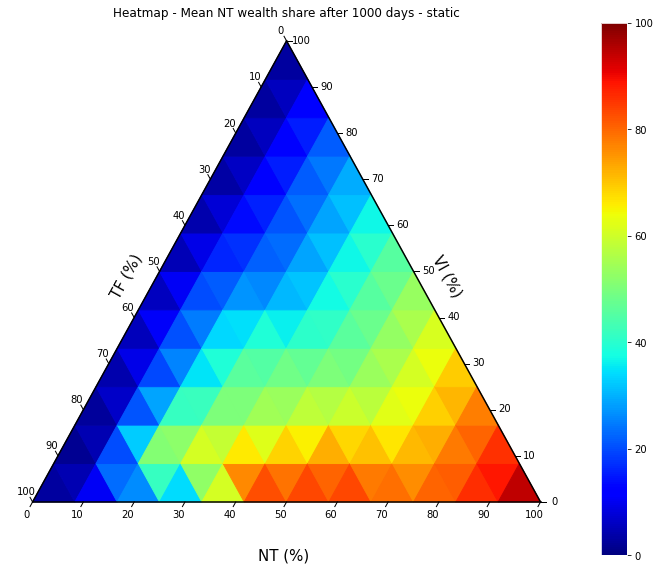

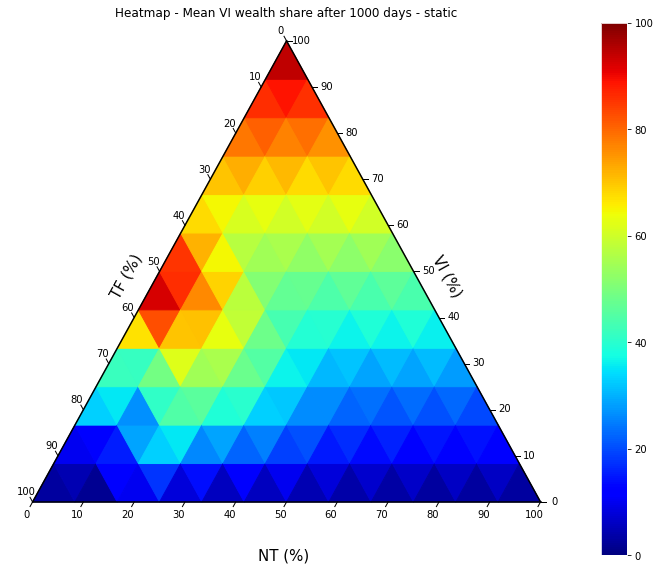

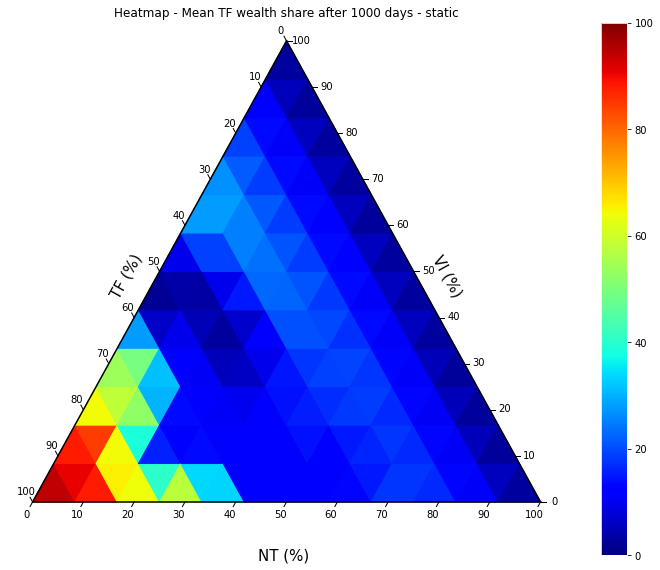

In [160]:
title = "Heatmap - Mean NT wealth share after 1000 days - static"
figure1, tax1 = generate_ternary_figure(scale, NTws1000, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_WS_static.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI wealth share after 1000 days - static"
figure2, tax2 = generate_ternary_figure(scale, VIws1000, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_WS_static.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF wealth share after 1000 days - static"
figure3, tax3 = generate_ternary_figure(scale, TFws1000, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_WS_static.png', dpi = 300)
tax3.show()

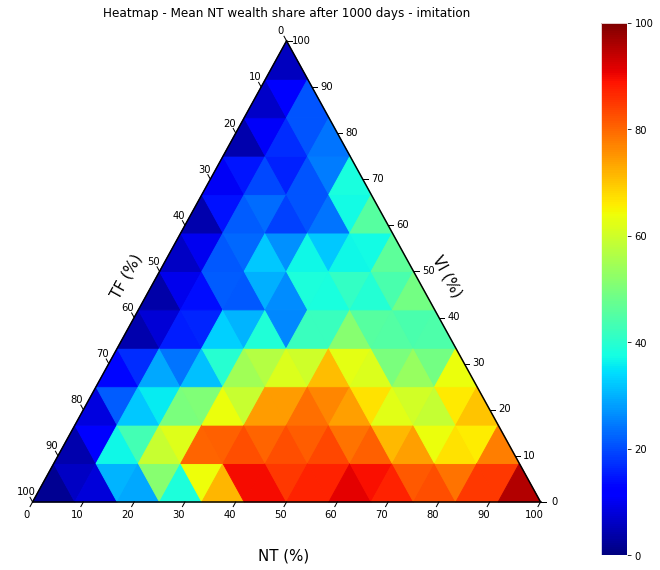

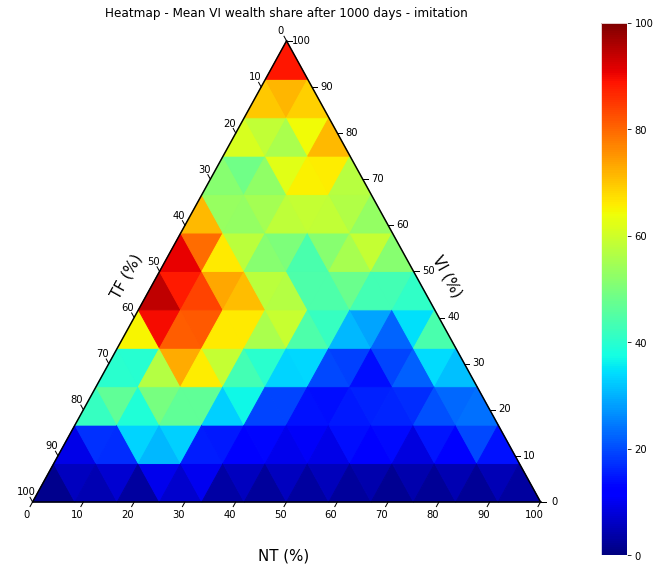

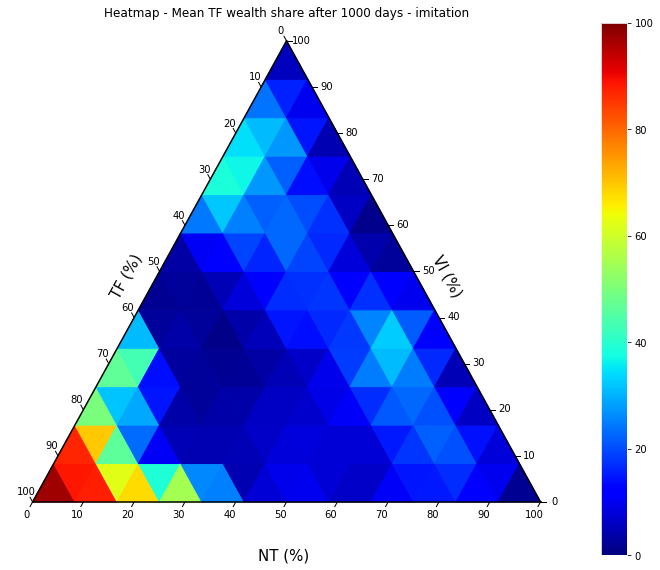

In [159]:
title = "Heatmap - Mean NT wealth share after 1000 days - imitation"
figure1, tax1 = generate_ternary_figure(scale, NTws1000Cb, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_WS_combined.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI wealth share after 1000 days - imitation"
figure2, tax2 = generate_ternary_figure(scale, VIws1000Cb, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_WS_combined.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF wealth share after 1000 days - imitation"
figure3, tax3 = generate_ternary_figure(scale, TFws1000Cb, title, color = 'jet', vmin = 0, vmax = 100)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_WS_combined.png', dpi = 300)
tax3.show()

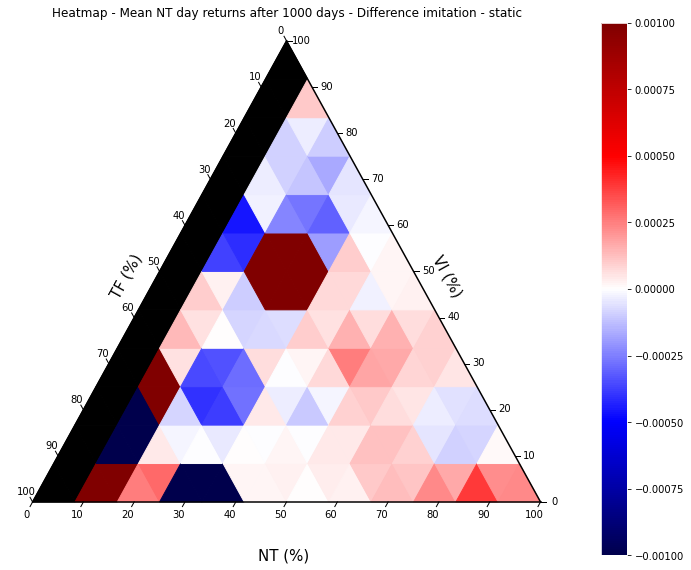

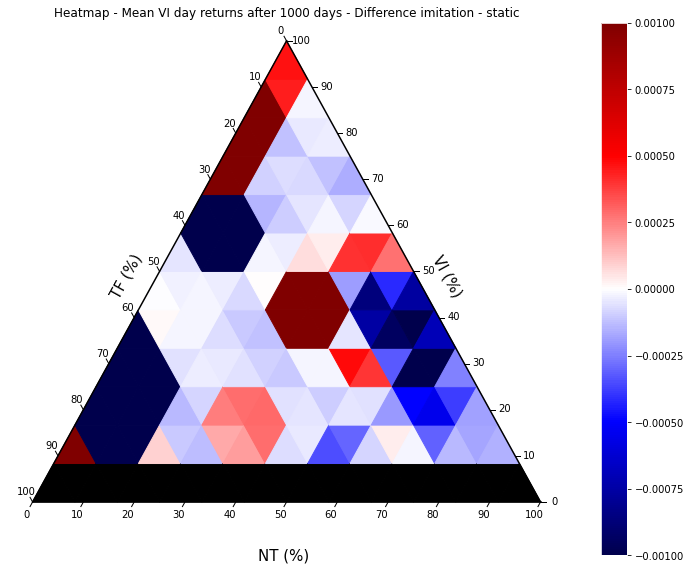

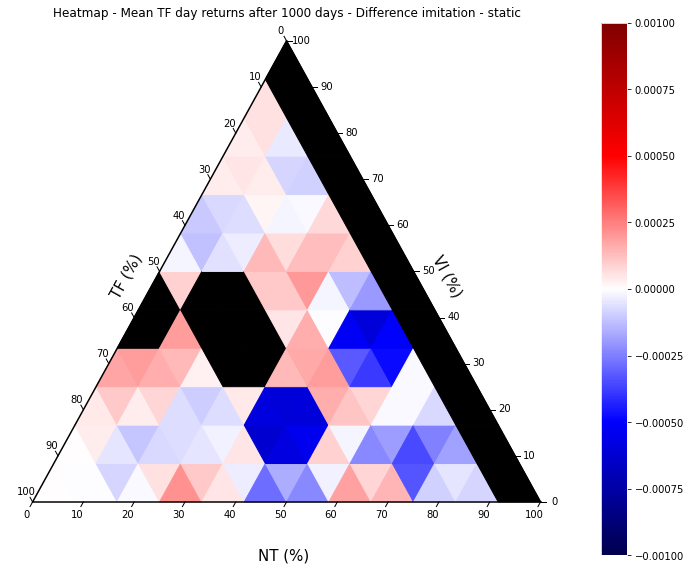

In [168]:
title = "Heatmap - Mean NT day returns after 1000 days - Difference imitation - static"
figure1, tax1 = generate_ternary_figure(scale, DiffNTdr, title, color = 'seismic', vmin = -0.001, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_DR_diff.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI day returns after 1000 days - Difference imitation - static"
figure2, tax2 = generate_ternary_figure(scale, DiffVIdr, title, color = 'seismic', vmin = -0.001, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_DR_diff.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF day returns after 1000 days - Difference imitation - static"
figure3, tax3 = generate_ternary_figure(scale, DiffTFdr, title, color = 'seismic', vmin = -0.001, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_DR_diff.png', dpi = 300)
tax3.show()

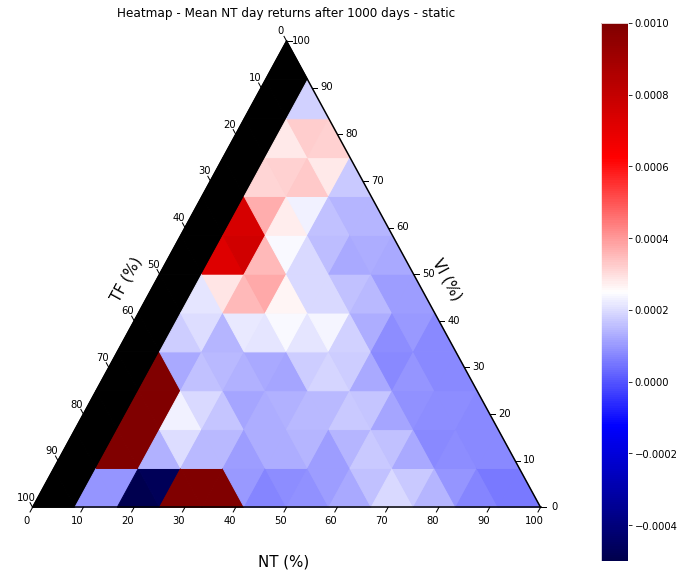

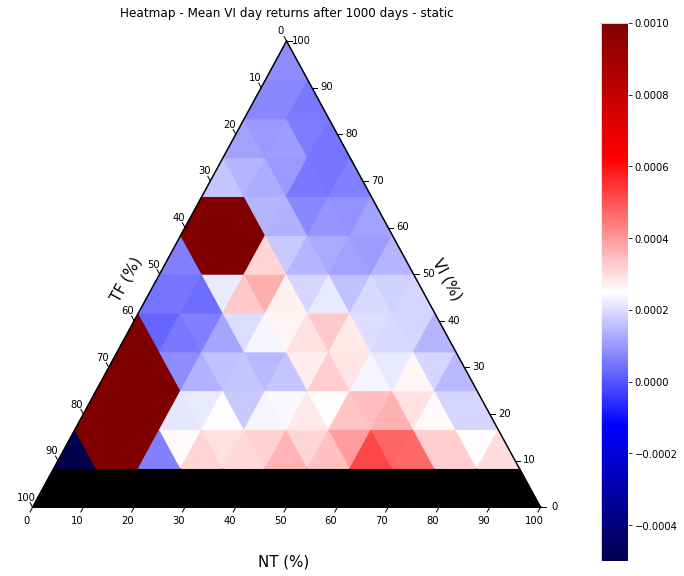

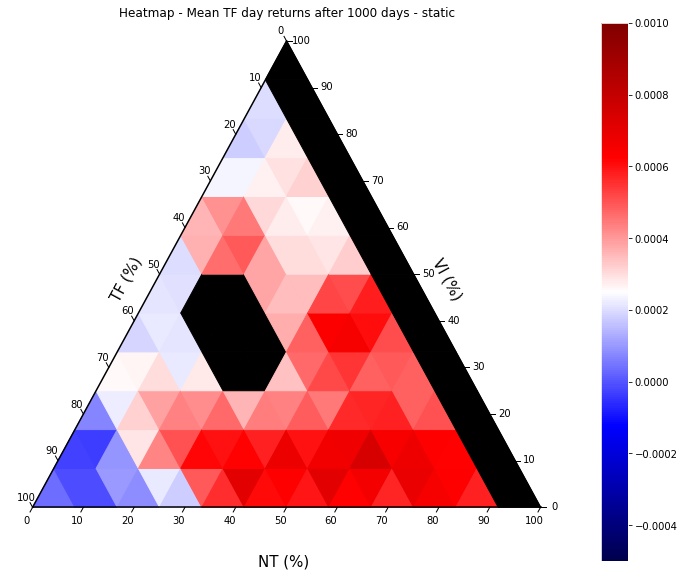

In [170]:
title = "Heatmap - Mean NT day returns after 1000 days - static"
figure1, tax1 = generate_ternary_figure(scale, NTdr1000, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_DR_static.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI day returns after 1000 days - static"
figure2, tax2 = generate_ternary_figure(scale, VIdr1000, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_DR_static.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF day returns after 1000 days - static"
figure3, tax3 = generate_ternary_figure(scale, TFdr1000, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_DR_static.png', dpi = 300)
tax3.show()



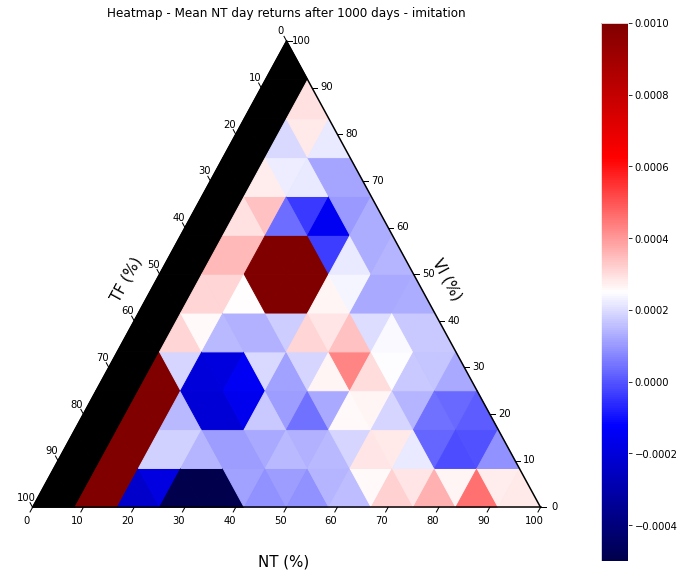

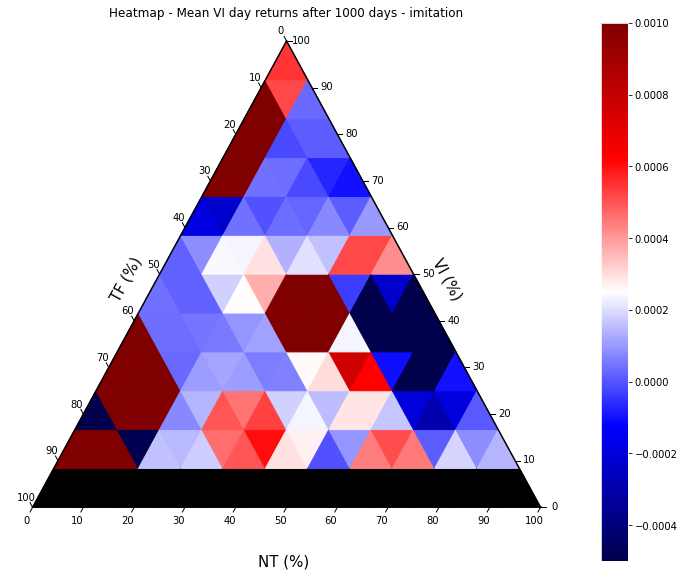

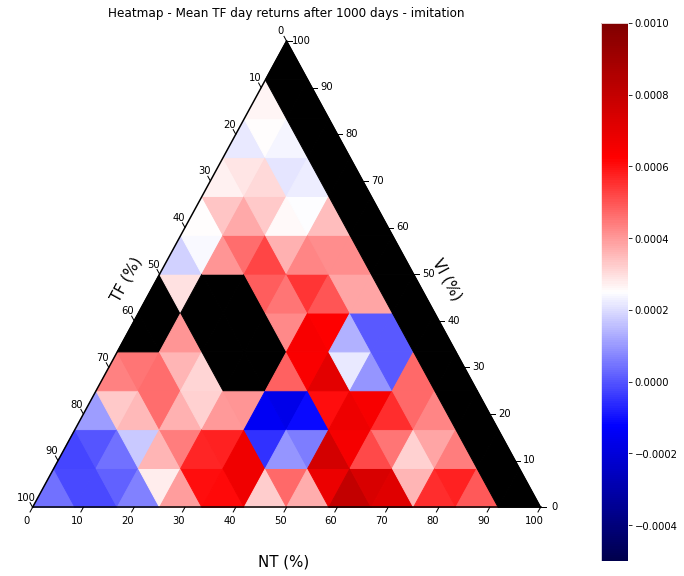

In [171]:
title = "Heatmap - Mean NT day returns after 1000 days - imitation"
figure1, tax1 = generate_ternary_figure(scale, NTdr1000Cb, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/NT_DR_imitation.png', dpi = 300)
tax1.show()

title = "Heatmap - Mean VI day returns after 1000 days - imitation"
figure2, tax2 = generate_ternary_figure(scale, VIdr1000Cb, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/VI_DR_imitation.png', dpi = 300)
tax2.show()

title = "Heatmap - Mean TF day returns after 1000 days - imitation"
figure3, tax3 = generate_ternary_figure(scale, TFdr1000Cb, title, color = 'seismic', vmin = -0.0005, vmax=0.001)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/ternary/TF_DR_imitation.png', dpi = 300)
tax3.show()

In [76]:
# print(VIdr1000)
VIdr1000_clean = dict()
for (i,j,k) in simplex_iterator(scale):
    if math.isnan(VIdr1000[(i,j)]) == True:
        VIdr1000_clean[(i,j)] = 0
    else:
        VIdr1000_clean[(i,j)] = VIdr1000[(i,j)] 

TFdr1000_clean = dict()
for (i,j,k) in simplex_iterator(scale):
    if math.isnan(TFdr1000[(i,j)]) == True:
        TFdr1000_clean[(i,j)] = 0
    else:
        TFdr1000_clean[(i,j)] = TFdr1000[(i,j)] 

# print(VIdr1000_clean)

DO excess returns to improve and center at 0?
transform to show annualised returns?


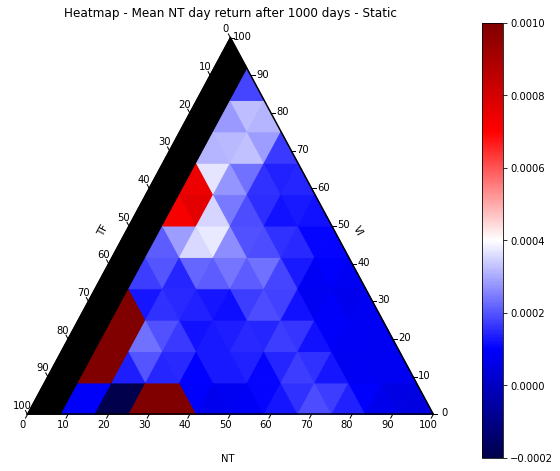

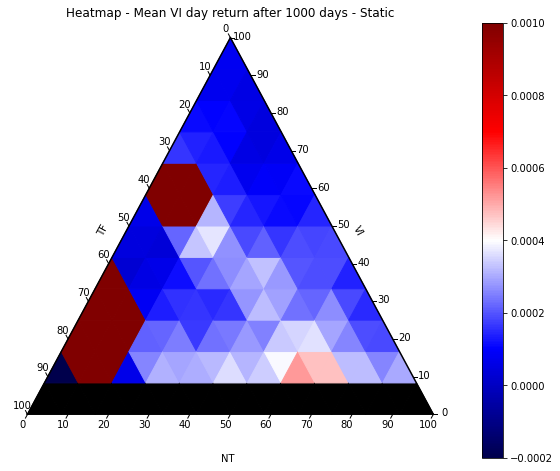

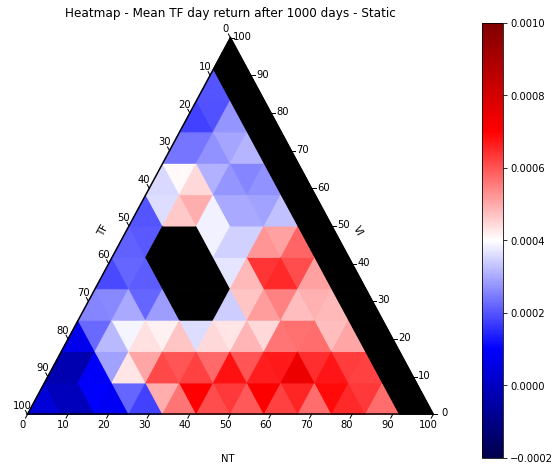

In [85]:
print('DO excess returns to improve and center at 0?')
print('transform to show annualised returns?')

title = "Heatmap - Mean NT day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, NTdr1000_clean, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, NTdr1000, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)

tax.show()

# title = "Heatmap - Mean VI day return after 1000 days - Static"
# # figure, tax = generate_ternary_figure_nonorm(scale, VIdr1000_clean, title, color = 'seismic')
# figure, tax = generate_ternary_figure(scale, VIdr1000_clean, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)
# tax.show()
title = "Heatmap - Mean VI day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, VIdr1000_clean, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, VIdr1000, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)
tax.show()

title = "Heatmap - Mean TF day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, TFdr1000, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, TFdr1000, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)
tax.show()

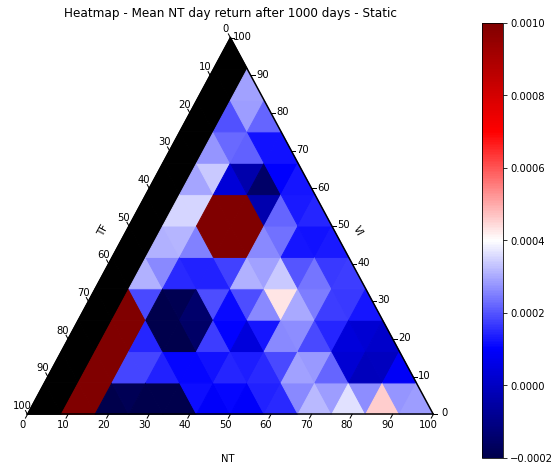

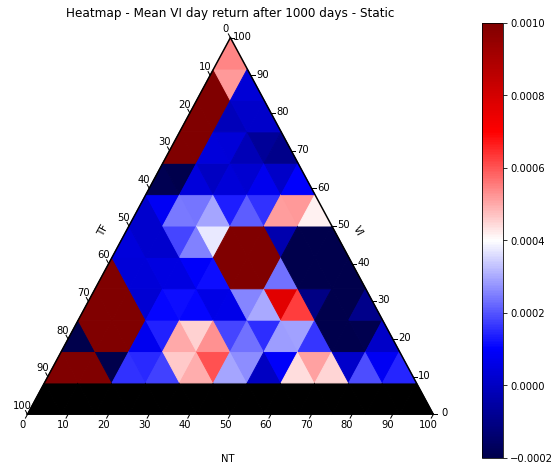

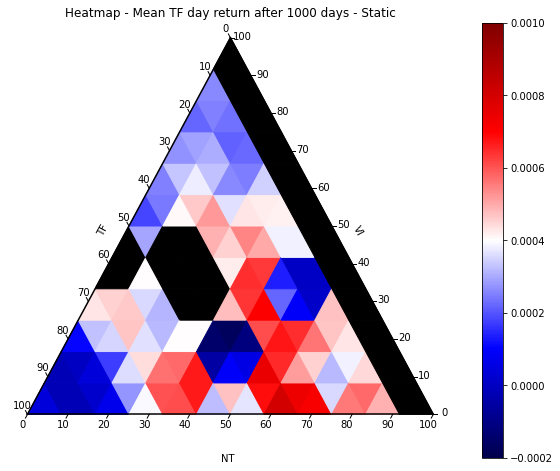

In [86]:
title = "Heatmap - Mean NT day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, NTdr1000_clean, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, NTdr1000Cb, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)

tax.show()

title = "Heatmap - Mean VI day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, VIdr1000_clean, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, VIdr1000Cb, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)
tax.show()

title = "Heatmap - Mean TF day return after 1000 days - Static"
# figure, tax = generate_ternary_figure_nonorm(scale, TFdr1000, title, color = 'seismic')
figure, tax = generate_ternary_figure(scale, TFdr1000Cb, title, color = 'seismic',vmin = -0.0002, vmax = 0.001)
tax.show()

In [ ]:
time = 100
agents = 3
tf_ws, vi_ws, nt_ws = generate_random_heatmap_data(scale, 'static', time, agents)



In [13]:
time = 100
agents = 3
tf_ws1000, vi_ws1000, nt_ws1000 = generate_random_heatmap_data(scale, 'static', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

In [6]:
time = 100
agents = 3
tf_ws_cb, vi_ws_cb, nt_ws_cb = generate_random_heatmap_data(scale, 'combined', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

In [9]:
time = 1000
agents = 3
tf_ws_cb1000, vi_ws_cb1000, nt_ws_cb1000 = generate_random_heatmap_data(scale, 'combined', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

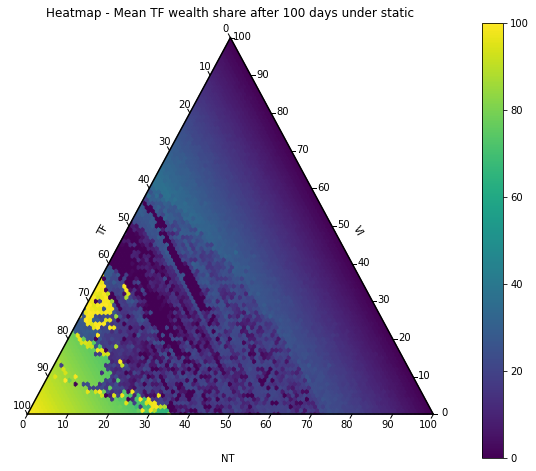

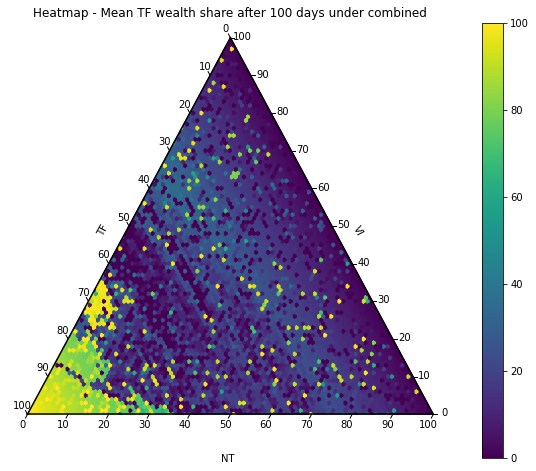

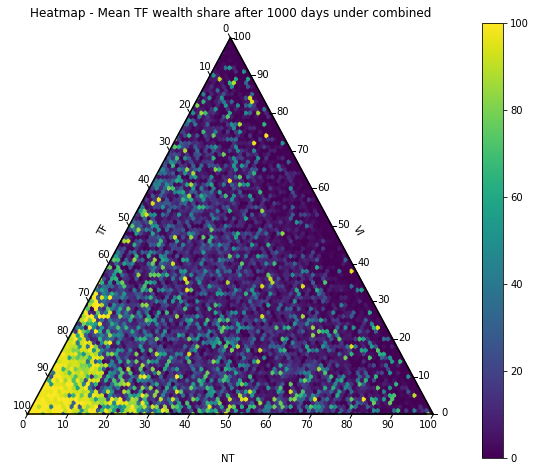

In [10]:

title = "Heatmap - Mean TF wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, tf_ws, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb1000, title)
tax.show()

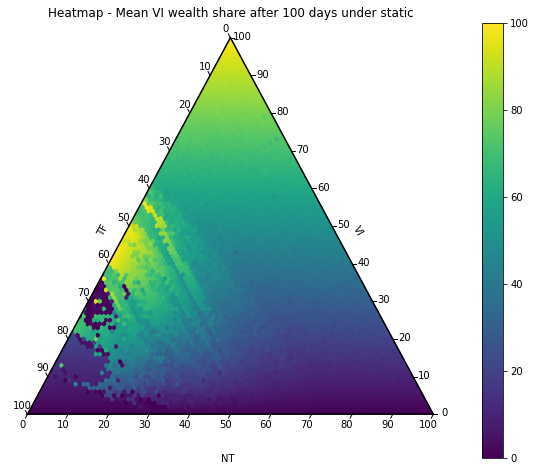

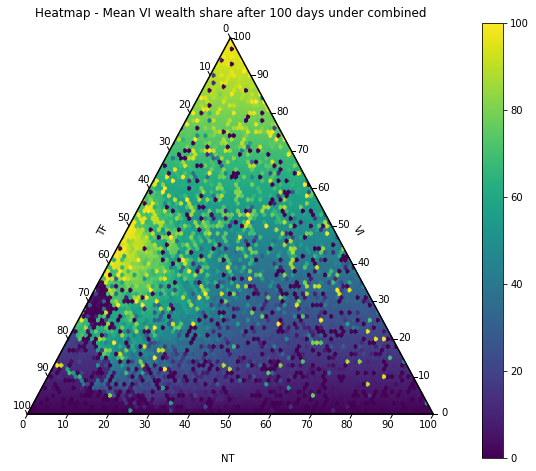

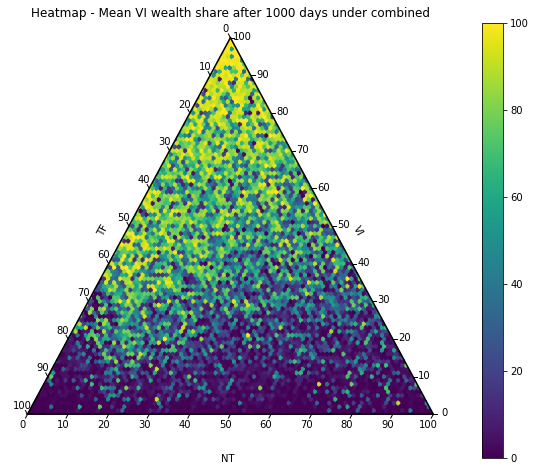

In [11]:
title = "Heatmap - Mean VI wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, vi_ws, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb1000, title)
tax.show()

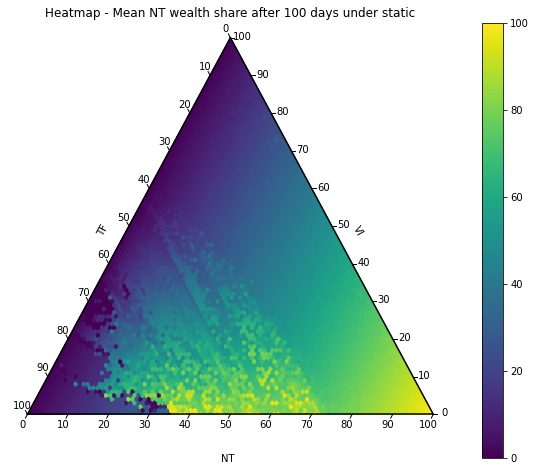

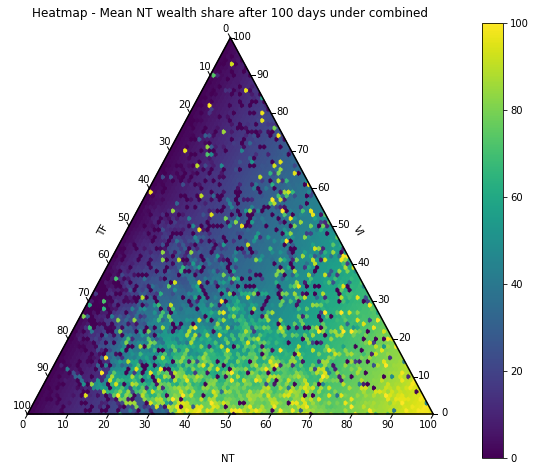

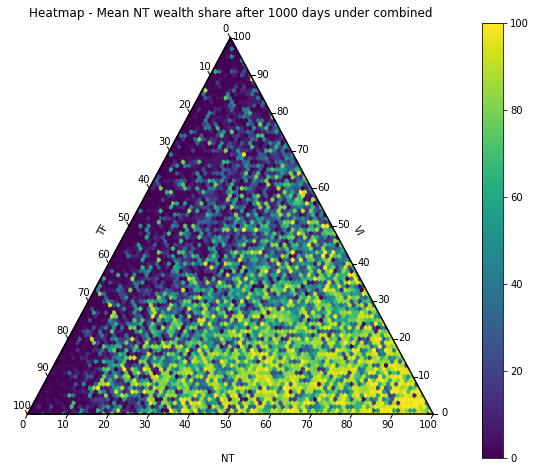

In [12]:
title = "Heatmap - Mean NT wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, nt_ws, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb1000, title)
tax.show()

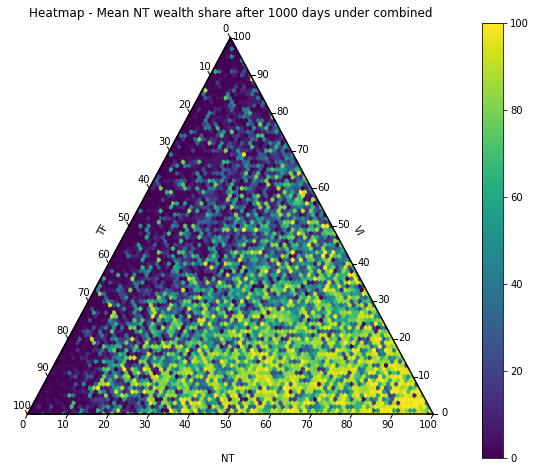

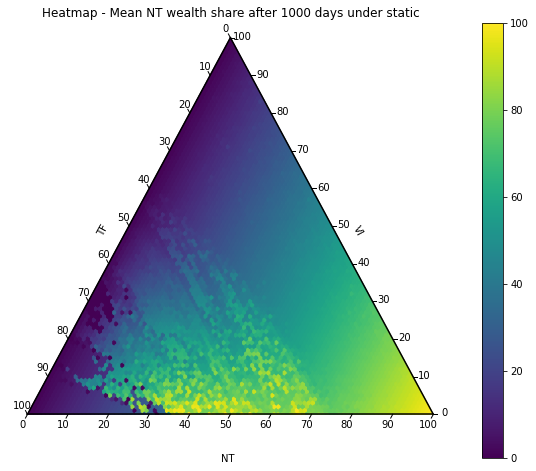

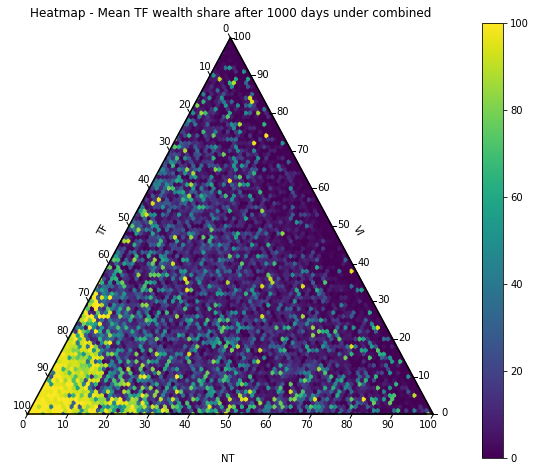

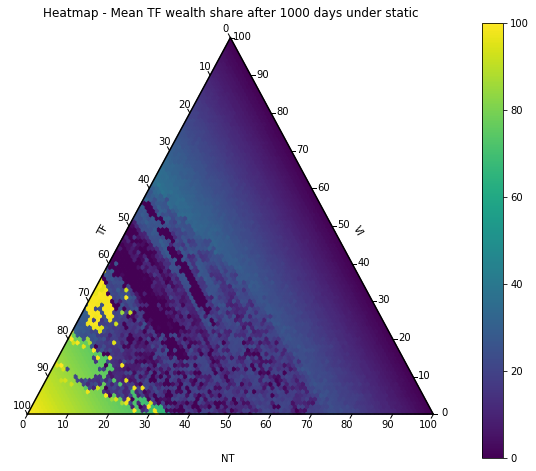

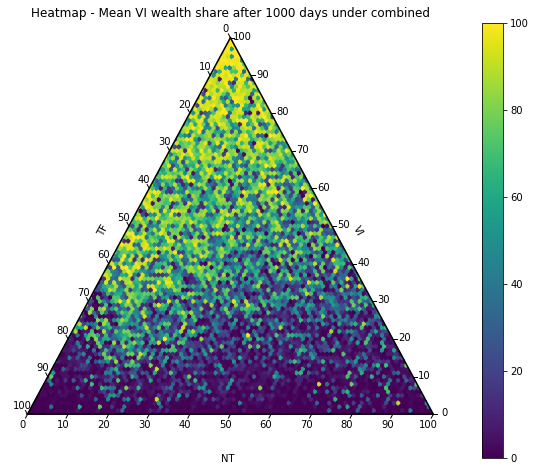

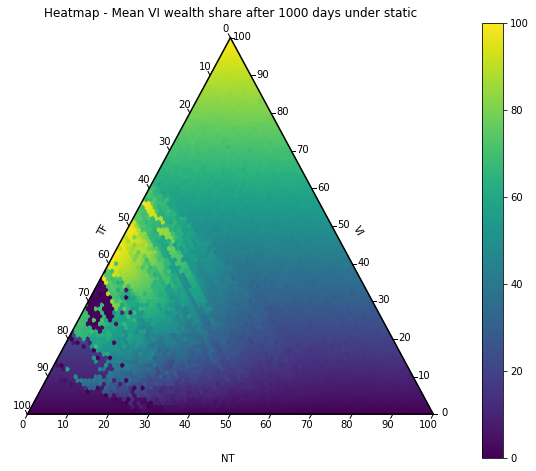

In [15]:
title = "Heatmap - Mean NT wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, nt_ws1000, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, tf_ws1000, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, vi_ws1000, title)
tax.show()

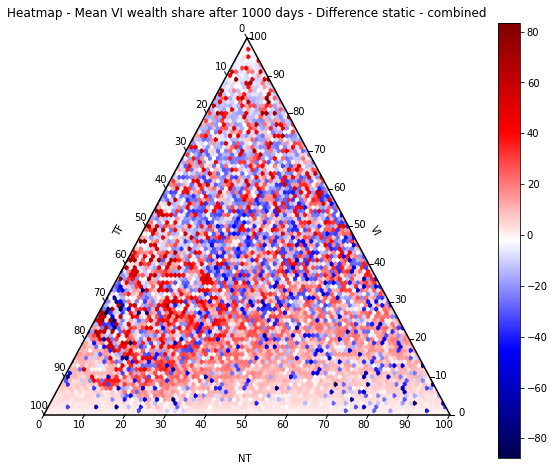

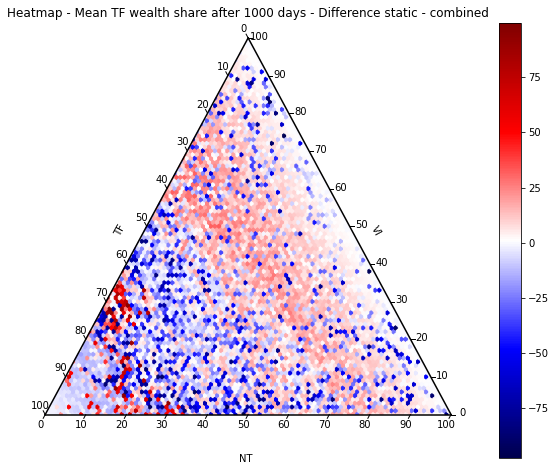

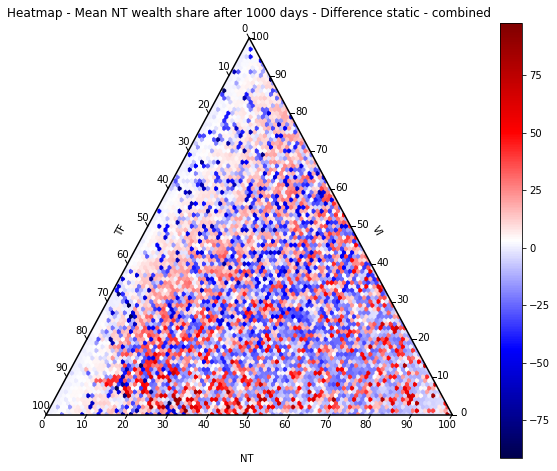

In [24]:
res = {key: vi_ws1000[key] - vi_ws_cb1000.get(key, 0) for key in vi_ws1000.keys()}

title = "Heatmap - Mean VI wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

res = {key: tf_ws1000[key] - tf_ws_cb1000.get(key, 0) for key in tf_ws1000.keys()}

title = "Heatmap - Mean TF wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

res = {key: nt_ws1000[key] - nt_ws_cb1000.get(key, 0) for key in nt_ws1000.keys()}

title = "Heatmap - Mean NT wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

